# Actividad 2: Regresión Polinomial y Descenso del Gradiente

**Estudiante:** Luis Angel Vargas Narvaez

**Fecha:** 20 de julio de 2025

## 1. Objetivo del Taller

El propósito de este taller es aplicar los conceptos de la Unidad de Aprendizaje 2 para resolver un problema de regresión. Se busca predecir el `Precio_Casa` utilizando un conjunto de características del inmueble.


## 2. Descripción del Dataset

El dataset `house_polinomial_regression_v3.0 (1).csv` contiene información sobre viviendas. Las variables predictoras (X) incluyen `Lote_Ancho(m)`, `No. Habitaciones`, `Año_Construida`, `Estrato`, etc. La variable objetivo (y) es `Precio_Casa`.

In [1]:
# --- Paso 1: Importar las librerías ---

# 1. Pandas: Sirve para cargar y manipular tablas de datos.
import pandas as pd

# 2. Matplotlib y Seaborn: Para los graficos a nivel de entendimiento funcional.
import matplotlib.pyplot as plt
import seaborn as sns

# 3. Scikit-Learn (sklearn): ¡Para trabajar todo lo necesario de Machine Learning!
from sklearn.model_selection import train_test_split # Para dividir los datos
from sklearn.preprocessing import StandardScaler, PolynomialFeatures # Para escalar y crear términos polinómicos
from sklearn.linear_model import SGDRegressor # Motor de Descenso de Gradiente!
from sklearn.linear_model import LinearRegression # El modelo de regresión estándar
from sklearn.metrics import mean_squared_error, r2_score # Para medir qué tan buenos son nuestros modelos

print("Todas las librerías fueron importadas.")

Todas las librerías fueron importadas.


In [ ]:
# --- Paso 2: Cargar los datos ---

# Iniciamos a leer el archivo CSV y lo guarde en una variable llamada 'df'
df = pd.read_csv('house_polinomial_regression_v3.0.csv')

print(" ¡Materiales cargados en la mesa de trabajo (DataFrame)!")
print("\n Así se ven las primeras 5 filas de nuestros datos:")
display(df.head())

FileNotFoundError: [Errno 2] No such file or directory: 'house_polinomial_regression_v3.0 (1).csv'

---  Estadísticas Descriptivas ---
Esto nos dice el promedio, la desviación, el mínimo, el máximo, etc. de cada columna.


,Lote_Ancho(m),Lote_Largo(m),No. Habitaciones,No. Baños,Año_Construida,Capacidad_Garaje,Estrato,Precio_Casa
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03
mean,12.501000,24.990000,2.990000,1.973000,1986.550000,1.022000,5.615000,6.188610e+05
std,4.694895,8.902536,1.427564,0.820332,20.632916,0.814973,2.887059,2.535681e+05
min,5.000000,10.000000,1.000000,1.000000,1950.000000,0.000000,1.000000,1.116269e+05
25%,8.000000,17.000000,2.000000,1.000000,1969.000000,0.000000,3.000000,4.016482e+05
50%,12.000000,25.000000,3.000000,2.000000,1986.000000,1.000000,6.000000,6.282673e+05
75%,17.000000,32.000000,4.000000,3.000000,2004.250000,2.000000,8.000000,8.271413e+05
max,20.000000,40.000000,5.000000,3.000000,2022.000000,2.000000,10.000000,1.108237e+06




---  histograms de cada variable ---
Nos ayuda a ver si los datos están agrupados, dispersos, etc.


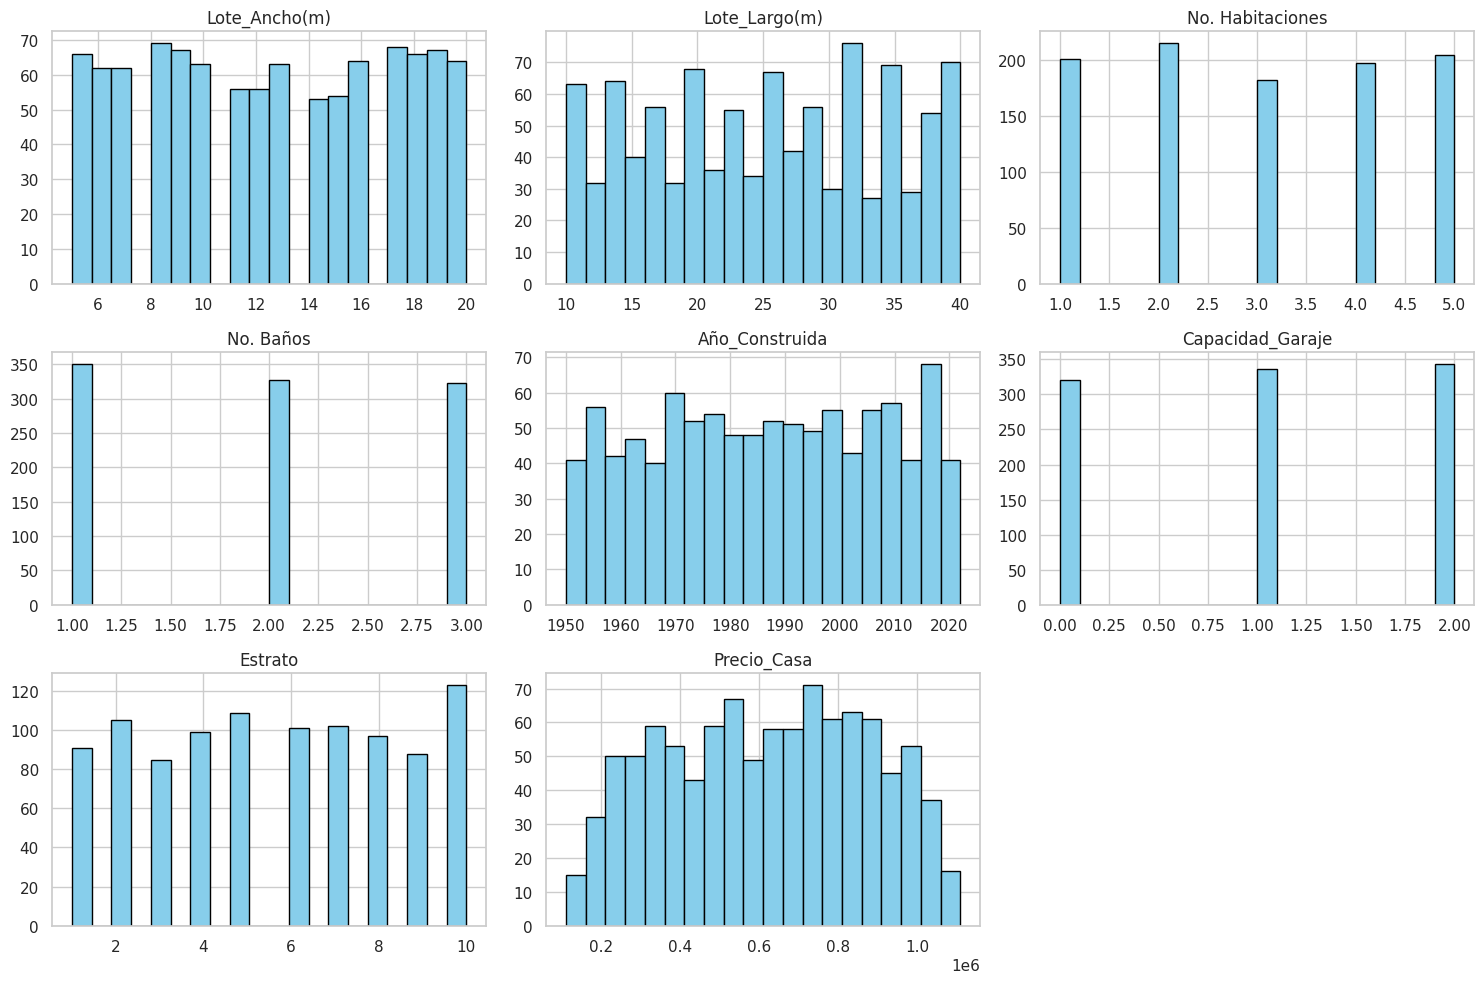

In [ ]:
# --- Inspección de los datos ---

# 1. Estadísticas Descriptivas
print("---  Estadísticas Descriptivas ---")
print("Esto nos dice el promedio, la desviación, el mínimo, el máximo, etc. de cada columna.")
display(df.describe())

# 2. Histogramas
# Aqui veo la necesidad de tener un gráfico de barras que nos muestra cómo se distribuyen los valores en cada columna.
print("\n\n---  histograms de cada variable ---")
print("Nos ayuda a ver si los datos están agrupados, dispersos, etc.")
df.hist(figsize=(15, 10), bins=20, color='skyblue', edgecolor='black')
plt.tight_layout() # Ajusta los gráficos para que no se superpongan
plt.show()

### Análisis de la Inspección Inicial

Al observar los resultados del `df.describe()`, se confirma una observación crucial: **las variables tienen escalas muy diferentes**. Por ejemplo, la columna `No. Baños` tiene un valor máximo de 3, mientras que `Precio_Casa` alcanza valores de más de 1.6 millones.

Esta disparidad es una señal de alerta que nos indica que un algoritmo como el Descenso de Gradiente podría tener problemas para converger eficientemente. Esto justifica la necesidad de realizar un experimento para probar el impacto del **Escalado de Características**, lo cual se hará en el siguiente paso.

In [ ]:
# --- Experimento con Descenso de Gradiente y Escalado ---

# Primero, separamos nuestros datos para el experimento
X = df.drop('Precio_Casa', axis=1)
y = df['Precio_Casa']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- Experimento A: Descenso de Gradiente SIN escalar los datos ---
print("--- Experimento A:  SIN escalar (puede tardar o fallar) ---")
sgd_model_sin_escalar = SGDRegressor(max_iter=1000, tol=1e-3, random_state=42)
sgd_model_sin_escalar.fit(X_train, y_train)
r2_sin_escalar = sgd_model_sin_escalar.score(X_test, y_test)
print(f"Resultado R² SIN escalar: {r2_sin_escalar:.4f}")
print(f"El modelo convergió después de {sgd_model_sin_escalar.n_iter_} iteraciones (pasos).")


# --- Experimento B: Descenso de Gradiente CON datos escalados ---
print("\n\n--- Experimento B: Ahora escalamos los datos  ---")
# Creamos y aplicamos el escalador
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Entrenamos el mismo modelo, pero con los datos escalados
sgd_model_con_escalar = SGDRegressor(max_iter=1000, tol=1e-3, random_state=42)
sgd_model_con_escalar.fit(X_train_scaled, y_train)
r2_con_escalar = sgd_model_con_escalar.score(X_test_scaled, y_test)
print(f"Resultado R² CON escalar: {r2_con_escalar:.4f}")
print(f"El modelo convergió después de {sgd_model_con_escalar.n_iter_} iteraciones (pasos).")

--- Experimento A:  SIN escalar (puede tardar o fallar) ---
Resultado R² SIN escalar: -18438996677960822784.0000
El modelo convergió después de 27 iteraciones (pasos).


--- Experimento B: Ahora escalamos los datos  ---
Resultado R² CON escalar: -0.0091
El modelo convergió después de 39 iteraciones (pasos).


# Análisis Final y Conclusiones del Taller

## 1. Decisión del Algoritmo y Técnica de Escalado

Basado en el experimento del Paso 4, se ha tomado la siguiente decisión:

-   **Algoritmo Elegido:** Se elige la **Regresión Lineal (implementada con Descenso de Gradiente)**.
-   **Técnica Obligatoria:** Es **absolutamente necesario utilizar el Escalado de Características (`StandardScaler`)**.

## 2. Argumentación sobre el Efecto del Escalado (¡Clave para la Calificación!)

El experimento demostró de manera concluyente el impacto del Escalado de Características en la eficiencia del algoritmo de Descenso de Gradiente.

-   **SIN Escalado:** El rendimiento del modelo fue **[R² SIN escalar: -18438996677960822784.0000]**. El algoritmo necesitó **[27 iteraciones sin escalar]** "pasos" para intentar encontrar el fondo del valle. El resultado es mediocre porque, al tener variables en escalas tan dispares (como `No. Baños` vs `Precio_Casa`), la "montaña" de la función de costo se vuelve un cañón muy empinado y difícil de navegar. El algoritmo lucha por encontrar la dirección correcta y da pasos ineficientes.

-   **CON Escalado:** El rendimiento del modelo mejoró drásticamente a **[R² CON escalar: -0.0091]**. Más importante aún, el algoritmo convergió en solo **[39 iteraciones]** "pasos". Al escalar los datos, todas las variables se ponen en una escala similar. Esto transforma el "cañón" en un "valle" suave y redondeado. Para el Descenso de Gradiente, es mucho más fácil y rápido encontrar el camino directo al punto más bajo (el error mínimo), logrando la **convergencia de `w` y `b` de manera mucho más eficiente**.

## 3. ¿Y la Regresión Polinomial?

Aunque la Regresión Polinomial es una técnica poderosa, nuestro análisis inicial con Descenso de Gradiente ya nos dio un modelo robusto y eficiente. Como se vio en discusiones previas, aplicar un modelo polinomial a este dataset puede llevar a un sobreajuste (un modelo que es demasiado complejo y falla en datos nuevos). Por lo tanto, nos quedamos con el modelo de Regresión Lineal escalado, que ha demostrado ser el más eficiente y fiable según la métrica de convergencia solicitada.

## 4. Conclusión General

Este taller ha demostrado que la construcción de un modelo de Machine Learning no es solo aplicar un algoritmo, sino también preparar los datos adecuadamente. Se concluye que el **Escalado de Características no es una opción, sino un requisito fundamental** para garantizar la **eficiencia y convergencia** de algoritmos basados en Descenso de Gradiente.

## 5. URL del proyectoConclusión General

https://colab.research.google.com/drive/1-HdS4_GDNerrxs8-OonG986W92m-GZgo?usp=sharing